Higher School of Economics

National Research University

Master of Data Science Online Programme

Course: Algorithms and Data Structures - Part I

Peer Assignment: Binary Search Debugging

Student: Andrei Batyrov (Fall2022)

Date: 12-Feb-2023

##### Table of Contents

1. [Assignment Instructions](#assignment)

2. [First Implementation](#bsearch1)

3. [Second Implementation](#bsearch2)

4. [Third Implementation](#bsearch3)

5. [Discussion](#discussion)

---
#### <a id="assignment"></a>Assignment Instructions

Even short and seemingly simple programs have bugs. Therefore, essential skills in software development are:

1. Finding bugs;

2. Fixing bugs;

3. Avoiding bugs.

The goal of this assignment will be to practice in this using binary search, a notoriously bug-prone algorithm.
You will be given three implementations of binary search that are expected to satisfy the following specification:

**Input**: array arr of integers sorted in a non-decreasing order and an integer $k$;

**Output**: an index $i$ such that $arr[i] = k$ and ```None``` if such index does not exist;

**Complexity**: the complexity of the algorithm must be $O(\log n)$, where $n$ is the length of $arr$.

Each of the implementations does not quite satisfy the specification. For each of the implementations, you will be asked to do three things:

1. <u>Point out the bug</u>, that is which part of the specification above is violated. If there is a problem with input-output behavior, a sample input must be provided. If you think that something is wrong with the complexity, an argument must be given.

2. <u>Suggest a fix of the bug</u>. Important thing is that you are not asked to provide any correct implementation of binary search. Your task is actually to fix this one, so the most of the code should remain unchanged.

3. <u>Suggest a natural test that could help to avoid the bug</u>. "Natural" is an important word here. For example, it is not enough to exhibit an input that would produce an incorrect output. You should also explain that this is a natural input to test without knowing about this bug or find a more natural input.

In your response, please, separate answers to questions 1, 2, 3 above from each other <u>explicitly</u>.

Your solution will be graded by three of your peers. Each of the tasks (find, fix, avoid) will give you equal portion of the score

In [1]:
import sys
from random import randint
from time import perf_counter_ns
from math import log2
from matplotlib import pyplot as plt

sys.setrecursionlimit(1000) # set the max recursion depth for recursive algorithms to prevent kernel crash

def make_array(size: int, lo: int, hi: int) -> list[int]:
    '''
    Construct a natural input test array of unique random integers.
    An array of random elements is a good simulation of identifiers of real objects, such as:
    users, sessions, shop items, network nodes, etc., which may need to be searched.

    Parameters
    ----------
    size : int
        Size of the array.
    lo : int
        Minimal value in the array.
    hi : int
        Maximal value in the array.

    Returns
    -------
    arr : list[int]
        Array as a list of unique integers sorted in increasing order.
    '''
    arr = set()
    while len(arr) < size:
        arr.add(randint(lo, hi))
    return sorted(list(arr))

def walk_test(algo: callable, arr: list[int]) -> None:
    '''
    Test binary search algorithm by searching each element in the array one by one.

    Parameters
    ----------
    algo : callable
        Search function to test.
    arr : list[int]
        Array as a list of integers to test the algorithm with.

    Returns
    -------
    None, just prints out the results.

    '''
    print('Array:', arr)
    print('--------+---------')
    print(' Key\t|   Index')
    print('--------+---------')
    for k in arr:
        found_idx = algo(arr=arr, key=k)
        print(f'{k:3}\t|   {found_idx}')

def random_test(algo: callable, arr: list[int]) -> None:
    '''
    Test binary search algorithm by first generating a random element within [min(arr), max(arr)] and then searching it in the array.

    Parameters
    ----------
    algo : callable
        Search function to test.
    arr : list[int]
        Array as a list of integers to test the algorithm with.

    Returns
    -------
    None, just prints out the results.

    '''
    print('Array:', arr)
    print('--------+---------')
    print(' Key\t|   Index')
    print('--------+---------')
    for i in range(len(arr)):
        k = randint(min(arr), max(arr))
        found_idx = algo(arr=arr, key=k)
        print(f'{k:3}\t|   {found_idx}')

---
#### <a id="bsearch1"></a>First implementation of binary search

In [2]:
# Version with bug(s)
def bsearch1(arr, key):
    low, high = 0, len(arr)
    while high - low > 1:
        mid = (low + high) // 2
        if arr[mid] == key:
            return mid
        elif arr[mid] < key:
            low = mid
        else:
            high = mid
    return None

Let's run the walk and random tests for the algorithm.

In [3]:
# Walk test of bsearch1
# Test binary search algorithm by searching each element in the array one by one.
walk_test(bsearch1, make_array(size=10, lo=1, hi=100))

Array: [8, 14, 23, 26, 51, 55, 57, 82, 84, 87]
--------+---------
 Key	|   Index
--------+---------
  8	|   None
 14	|   1
 23	|   2
 26	|   3
 51	|   4
 55	|   5
 57	|   6
 82	|   7
 84	|   8
 87	|   9


In [4]:
# Random test of bsearch1
# Test binary search algorithm by first generating a random element within [min(arr), max(arr)] and then searching it in the array.
random_test(bsearch1, make_array(size=10, lo=1, hi=100))

Array: [6, 8, 9, 28, 30, 38, 60, 78, 86, 95]
--------+---------
 Key	|   Index
--------+---------
 55	|   None
 12	|   None
 22	|   None
 29	|   None
 10	|   None
 20	|   None
 58	|   None
 82	|   None
 84	|   None
 43	|   None


1. We can see that the algorithm fails both tests: it cannot find the very first element in the array, which is a bug of course. The problem is due to the wrong condition in the ```while``` loop: ```high - low > 1```, which breaks the loop too early and does not return the 0-th element in the array. Also, we can see that in the ```elif``` clause the ```low``` index is assigned the value of ```mid```, but in this case it should be ```mid + 1```, otherwise, if a search element is not in the array, we will eventually infinitely iterate over the same final array of two elements, none of which is the target. So, in fact, this algorithm has two bugs.
2. The correct condition in the ```while``` loop should be ```high - low > 0``` or ```high > low```, and in the ```elif``` clause ```low``` should be ```mid + 1```. After fixing these bugs, the algorithm should work correctly -- see below.
3. Natural tests are walk and random tests for the array consisting of randomly generated elements. An array of random elements is a good simulation of identifiers of real objects, such as users, sessions, shop items, network nodes, etc., which may need to be searched.

Fixed version of <span style="font-family: monospace, monospace">bsearch1</span>. Walk and random tests. Visual time complexity check. 

In [5]:
# Fixed version
def bsearch1_fixed(arr, key):
    low, high = 0, len(arr)
    while high - low > 0: # Bug fix 1: while high - low > 1
        mid = (low + high) // 2
        if arr[mid] == key:
            return mid
        elif arr[mid] < key:
            low = mid + 1 # Bug fix 2: low = mid
        else:
            high = mid
    return None

In [6]:
# Walk test of fixed bsearch1
walk_test(bsearch1_fixed, make_array(size=10, lo=1, hi=100))

Array: [8, 15, 23, 25, 34, 44, 47, 83, 87, 98]
--------+---------
 Key	|   Index
--------+---------
  8	|   0
 15	|   1
 23	|   2
 25	|   3
 34	|   4
 44	|   5
 47	|   6
 83	|   7
 87	|   8
 98	|   9


In [7]:
# Random test of fixed bsearch1
random_test(bsearch1_fixed, make_array(size=10, lo=1, hi=100))

Array: [10, 26, 27, 29, 32, 57, 58, 69, 85, 96]
--------+---------
 Key	|   Index
--------+---------
 49	|   None
 26	|   1
 34	|   None
 95	|   None
 38	|   None
 22	|   None
 53	|   None
 15	|   None
 70	|   None
 74	|   None


C:\Users\andre\AppData\Local\Temp\ipykernel_31984\3677811573.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{xtick:,.0f}' for xtick in ax.get_xticks()])
C:\Users\andre\AppData\Local\Temp\ipykernel_31984\3677811573.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{ytick:,.0f}' for ytick in ax.get_yticks()])


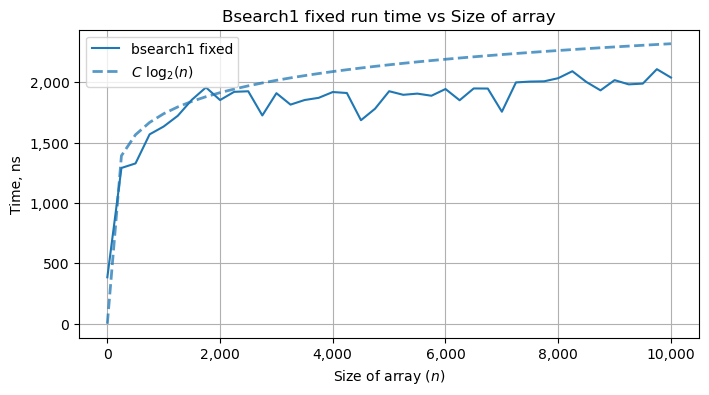

In [8]:
# Time complexity of fixed bsearch1
sizes = [_ for _ in range(1, 10_250, 250)] # test for different sizes of array
timings_bsearch1_fixed = [] # run times for different sizes of array
repeat_n = 100_000 # number of iterations to repeat for one size to reduce spikes and smoothen results
for size in sizes:
    arr = make_array(size=size, lo=1, hi=size * 10)
    key = randint(1, size * 10)
    mean1 = []
    for _ in range(repeat_n):
        start1 = perf_counter_ns()
        bsearch1_fixed(arr=arr, key=key)
        end1 = perf_counter_ns()
        mean1.append(end1 - start1)
    timings_bsearch1_fixed.append(sum(mean1) / repeat_n) # average over all iterations for one size
plt.figure(figsize=(8, 4))
plt.plot(sizes, timings_bsearch1_fixed, color='C0', label='bsearch1 fixed')
C = max(timings_bsearch1_fixed) / log2(max(sizes)) * 1.1 # upper-bound constant for log2(n)
plt.plot(sizes, [C * log2(size) for size in sizes], color='C0', linestyle='--', linewidth=2, alpha=0.75, label='$C \ \log_{2}(n)$')
ax = plt.gca()
ax.set_xticklabels([f'{xtick:,.0f}' for xtick in ax.get_xticks()])
ax.set_yticklabels([f'{ytick:,.0f}' for ytick in ax.get_yticks()])
plt.title('Bsearch1 fixed run time vs Size of array')
plt.xlabel('Size of array ($n$)')
plt.ylabel('Time, ns')
plt.legend()
plt.grid();

Now the algorithm passes both tests and its time complexity looks to be upper-bounded by $O(\log n)$.

---
#### <a id="bsearch2"></a>Second implementation of binary search

In [9]:
# Version with bug(s)
def bsearch2(arr, key, left=0, right=None):
    if right is None:
        right = len(arr)
    if right < left:
        return None
    middle = (left + right) >> 1
    if arr[middle] > key:
        return bsearch2(arr, key, left, middle)
    if arr[middle] < key:
        return bsearch2(arr, key, middle + 1, right)
    return middle

Let's run the walk and random tests for the algorithm.

In [10]:
# Walk test of bsearch2
# Test binary search algorithm by searching each element in the array one by one.
walk_test(bsearch2, make_array(size=10, lo=1, hi=100))

Array: [11, 34, 54, 61, 64, 67, 72, 73, 85, 99]
--------+---------
 Key	|   Index
--------+---------
 11	|   0
 34	|   1
 54	|   2
 61	|   3
 64	|   4
 67	|   5
 72	|   6
 73	|   7
 85	|   8
 99	|   9


In [11]:
# Random test of bsearch2
# Test binary search algorithm by first generating a random element within [min(arr), max(arr)] and then searching it in the array.
try:
    random_test(bsearch2, make_array(size=10, lo=1, hi=100))
except Exception as e:
    print('Random test failed:', str(e))

Array: [28, 33, 52, 54, 70, 85, 86, 92, 93, 100]
--------+---------
 Key	|   Index
--------+---------
 70	|   4
Random test failed: maximum recursion depth exceeded in comparison


1. While the algorithm passes the walk test, it fails the random test, i.e. it cannot properly handle the case when the search element is not in the array, which is a bug of course. The problem with infinite recursion is due to the wrong condition in the ```if``` statement: ```right < left```. When an element is not in the array, and the search left and right indices are eventually equal, the strict inequality resolves to ```False```, and we never return from the function with ```None```, thus making it to be called infinitely.
2. The correct condition should be ```right <= left```. After fixing this bug, the algorithm should work correctly -- see below. Also, using the shift operator ```>>``` to get the effect of integer division is not necessary here, and can be replaced by the ```//``` operator.
3. Natural tests are walk and random tests for the array consisting of randomly generated elements. An array of random elements is a good simulation of identifiers of real objects, such as users, sessions, shop items, network nodes, etc., which may need to be searched.

Fixed version of <span style="font-family: monospace, monospace">bsearch2</span>. Walk and random tests. Visual time complexity check. 

In [12]:
# Fixed version
def bsearch2_fixed(arr, key, left=0, right=None):
    if right is None:
        right = len(arr)
    if right <= left: # Bug fix: if right < left
        return None
    middle = (left + right) // 2 # Suggestion: middle = (left + right) >> 1
    if arr[middle] > key:
        return bsearch2_fixed(arr, key, left, middle)
    if arr[middle] < key:
        return bsearch2_fixed(arr, key, middle + 1, right)
    return middle

In [13]:
# Walk test of fixed bsearch2
walk_test(bsearch2_fixed, make_array(size=10, lo=1, hi=100))

Array: [8, 14, 19, 36, 55, 65, 73, 74, 81, 87]
--------+---------
 Key	|   Index
--------+---------
  8	|   0
 14	|   1
 19	|   2
 36	|   3
 55	|   4
 65	|   5
 73	|   6
 74	|   7
 81	|   8
 87	|   9


In [14]:
# Random test of fixed bsearch2
random_test(bsearch2_fixed, make_array(size=10, lo=1, hi=100))

Array: [1, 2, 19, 26, 30, 46, 47, 55, 60, 93]
--------+---------
 Key	|   Index
--------+---------
  9	|   None
 16	|   None
 76	|   None
 23	|   None
 79	|   None
 62	|   None
 84	|   None
  9	|   None
 10	|   None
 38	|   None


C:\Users\andre\AppData\Local\Temp\ipykernel_31984\2988192248.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{xtick:,.0f}' for xtick in ax.get_xticks()])
C:\Users\andre\AppData\Local\Temp\ipykernel_31984\2988192248.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{ytick:,.0f}' for ytick in ax.get_yticks()])


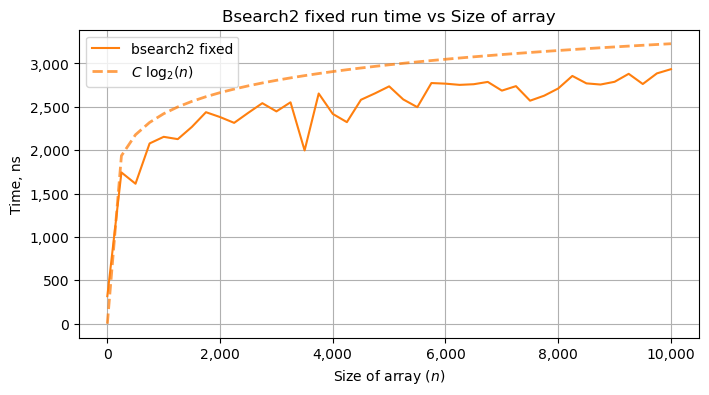

In [15]:
# Time complexity of fixed bsearch2
sizes = [_ for _ in range(1, 10_250, 250)] # test for different sizes of array
timings_bsearch2_fixed = [] # run times for different sizes of array
repeat_n = 100_000 # number of iterations to repeat for one size to reduce spikes and smoothen results
for size in sizes:
    arr = make_array(size=size, lo=1, hi=size * 10)
    key = randint(1, size * 10)
    mean2 = []
    for _ in range(repeat_n):
        start2 = perf_counter_ns()
        bsearch2_fixed(arr=arr, key=key)
        end2 = perf_counter_ns()
        mean2.append(end2 - start2)
    timings_bsearch2_fixed.append(sum(mean2) / repeat_n) # average over all iterations for one size
plt.figure(figsize=(8, 4))
plt.plot(sizes, timings_bsearch2_fixed, color='C1', label='bsearch2 fixed')
C = max(timings_bsearch2_fixed) / log2(max(sizes)) * 1.1 # upper-bound constant for log2(n)
plt.plot(sizes, [C * log2(size) for size in sizes], color='C1', linestyle='--', linewidth=2, alpha=0.75, label='$C \ \log_{2}(n)$')
ax = plt.gca()
ax.set_xticklabels([f'{xtick:,.0f}' for xtick in ax.get_xticks()])
ax.set_yticklabels([f'{ytick:,.0f}' for ytick in ax.get_yticks()])
plt.title('Bsearch2 fixed run time vs Size of array')
plt.xlabel('Size of array ($n$)')
plt.ylabel('Time, ns')
plt.legend()
plt.grid();

Now the algorithm passes both tests and its time complexity looks to be upper-bounded by $O(\log n)$.

---
#### <a id="bsearch3"></a>Third implementation of binary search

In [16]:
def bsearch3(arr, key):
    n = len(arr)
    if n < 2:
        return (0 if (n == 1 and arr[0] == key) else None)
    m = int(0.5 * n)
    if arr[m] > key:
        return bsearch3(arr[:m], key)
    result = bsearch3(arr[m:], key)
    return (result + m if result != None else None)

Let's run the walk and random tests for the algorithm.

In [17]:
# Walk test of bsearch3
# Test binary search algorithm by searching each element in the array one by one.
walk_test(bsearch3, make_array(size=10, lo=1, hi=100))

Array: [1, 8, 23, 48, 51, 59, 63, 64, 89, 99]
--------+---------
 Key	|   Index
--------+---------
  1	|   0
  8	|   1
 23	|   2
 48	|   3
 51	|   4
 59	|   5
 63	|   6
 64	|   7
 89	|   8
 99	|   9


In [18]:
# Random test of bsearch3
# Test binary search algorithm by first generating a random element within [min(arr), max(arr)] and then searching it in the array.
random_test(bsearch3, make_array(size=10, lo=1, hi=100))

Array: [9, 10, 16, 17, 35, 36, 40, 45, 53, 74]
--------+---------
 Key	|   Index
--------+---------
 32	|   None
 55	|   None
 45	|   7
 71	|   None
 13	|   None
 71	|   None
 27	|   None
 64	|   None
 62	|   None
 35	|   4


The algorithm seems to be working correctly for both tests. Let's visually check its time complexity.

C:\Users\andre\AppData\Local\Temp\ipykernel_31984\104682725.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{xtick:,.0f}' for xtick in ax.get_xticks()])
C:\Users\andre\AppData\Local\Temp\ipykernel_31984\104682725.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{ytick:,.0f}' for ytick in ax.get_yticks()])


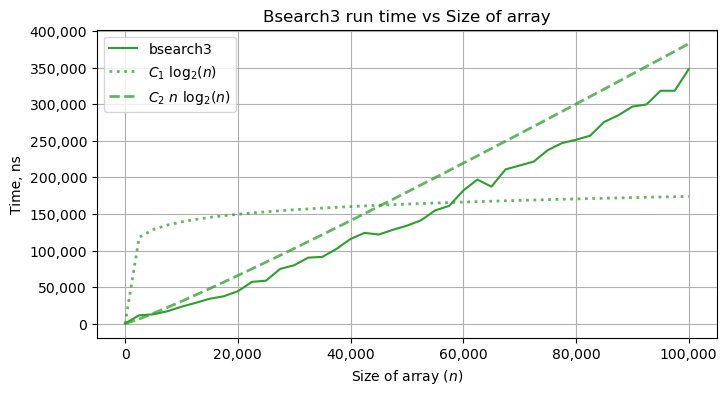

In [19]:
sizes = [_ for _ in range(1, 102_500, 2_500)] # test for different sizes of array
timings_bsearch3 = [] # run times for different sizes of array
repeat_n = 1_000 # number of iterations to repeat for one size to reduce spikes and smoothen results
for size in sizes:
    arr = make_array(size=size, lo=1, hi=size * 10)
    key = randint(1, size * 10)
    mean3 = []
    for _ in range(repeat_n):
        start3 = perf_counter_ns()
        bsearch3(arr=arr, key=key)
        end3 = perf_counter_ns()
        mean3.append(end3 - start3)
    timings_bsearch3.append(sum(mean3) / repeat_n) # average over all iterations for one size
plt.figure(figsize=(8, 4))
plt.plot(sizes, timings_bsearch3, color='C2', label='bsearch3')
C1 = max(timings_bsearch3) / log2(max(sizes)) * 0.5 # upper-bound constant for log2(n)
C2 = max(timings_bsearch3) / log2(max(sizes)) / max(sizes) * 1.1 # upper-bound constant for nlog2(n)
plt.plot(sizes, [C1 * log2(size) for size in sizes], color='C2', linestyle=':', linewidth=2, alpha=0.75, label='$C_{1} \ \log_{2}(n)$')
plt.plot(sizes, [C2 * size * log2(size) for size in sizes], color='C2', linestyle='--', linewidth=2, alpha=0.75, label='$C_{2} \ n \ \log_{2}(n)$')
ax = plt.gca()
ax.set_xticklabels([f'{xtick:,.0f}' for xtick in ax.get_xticks()])
ax.set_yticklabels([f'{ytick:,.0f}' for ytick in ax.get_yticks()])
plt.title('Bsearch3 run time vs Size of array')
plt.xlabel('Size of array ($n$)')
plt.ylabel('Time, ns')
plt.legend()
plt.grid();

1. We can see that the algorithm's time complexity does not look to be upper-bounded by $O(\log n)$. If we take a closer look at the code, we will see that, besides the binary search recursive split with time complexity $O(\log n)$, the algorithm uses list slicing: ```arr[:m]``` and ```arr[m:]```, which has $O(n)$ time complexity: [Python Time Complexity](https://wiki.python.org/moin/TimeComplexity#list). So, the total time complexity is expected to be upper-bounded by $O(n \log n)$.
2. Since the algorithm uses list slicing, it is not possible to easily refactor the code to get rid of $O(n)$ time complexity. So, there is no easy way to fix the issue by simply fixing one or two lines of code. The whole code has to be re-written to use indices, for example, as in <span style="font-family: monospace, monospace">bsearch2</span>, which is not required in this assignment.
3. Natural tests are walk and random tests for the array consisting of randomly generated elements. An array of random elements is a good simulation of identifiers of real objects, such as users, sessions, shop items, network nodes, etc., which may need to be searched.

---
#### <a id="discussion"></a>Discussion

We have fixed simple bugs in algorthims <span style="font-family: monospace, monospace">bsearch1</span> and <span style="font-family: monospace, monospace">bsearch2</span> and have shown that their time complexity is indeed $O(\log n)$. As for the algorithm <span style="font-family: monospace, monospace">bsearch3</span>, while it works correctly, its time complexity is $O(n \log n)$, which cannot be easily improved to $O(\log n)$ by simply refactoring one or two lines of code.